##  What is LOF (Local Outlier Factor)?
LOF answers: “Is this point in a region less dense than its neighbors?”

It does this by computing:
1. k-distance: Distance to its kth nearest neighbor.
2. Reachability distance: A distance that considers the density of neighbors.
3. Local reachability density (LRD): How dense the neighborhood around a point is.
4. LOF score: Ratio of average LRD of neighbors to the LRD of the point.

If LOF ≈ 1, the point is normal.

If LOF >> 1, the point is anomalous (outlier).

In [1]:
## Basic Usage (Unsupervised Anomaly Detection)

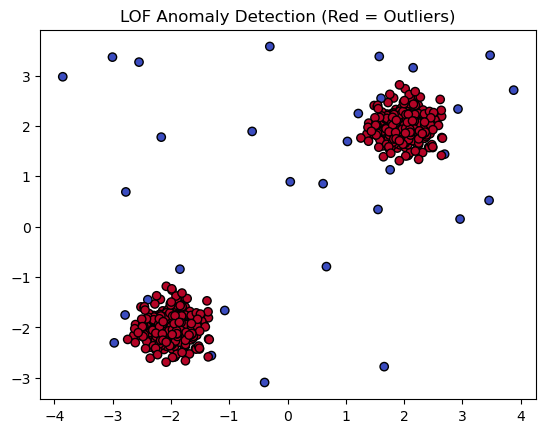

In [2]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(300, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers + 2, X_inliers - 2, X_outliers]

# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.title("LOF Anomaly Detection (Red = Outliers)")
plt.show()


 Interpretation
y_pred:

1 = inlier

-1 = outlier

negative_outlier_factor_:

Lower values = more anomalous.

| Parameter       | Purpose                                   |
| --------------- | ----------------------------------------- |
| `n_neighbors`   | Controls the size of local neighborhood   |
| `contamination` | Approximate % of outliers in data         |
| `metric`        | Distance metric (default: `minkowski`)    |
| `novelty`       | Allows predicting on **unseen test data** |


🚀 Advanced: LOF for Unseen/Test Data (Novelty Detection)

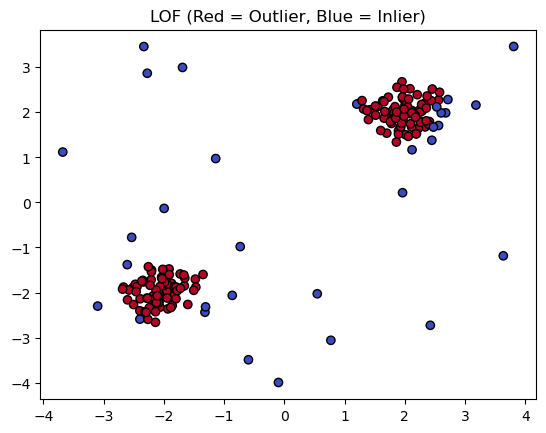

In [5]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 0.3 * np.random.randn(300, 2)
X = np.r_[X + 2, X - 2]

# Create a few outliers (only in test set)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Split train and test
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Append outliers to test set
X_test = np.vstack([X_test, X_outliers])

# Fit LOF on training set (with novelty=True)
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train)

# Predict on test data
y_pred = lof.predict(X_test)  # -1 for outliers, 1 for inliers
scores = -lof.decision_function(X_test)

# Plot results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("LOF (Red = Outlier, Blue = Inlier)")
plt.show()


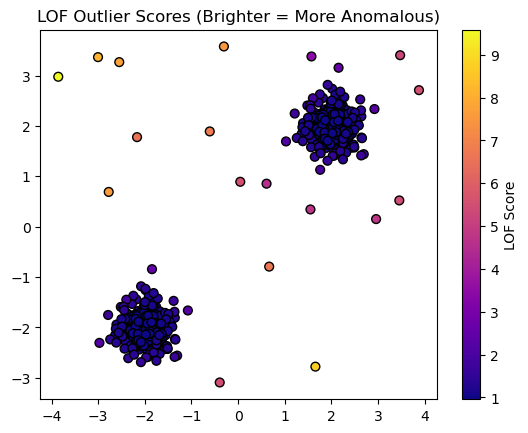

In [4]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='k',
            c=lof_scores, cmap='plasma', s=40)
plt.colorbar(label="LOF Score")
plt.title("LOF Outlier Scores (Brighter = More Anomalous)")
plt.show()


| Method           | Good for                      | Weakness                   |
| ---------------- | ----------------------------- | -------------------------- |
| **LOF**          | Local, density-based outliers | Sensitive to `n_neighbors` |
| Isolation Forest | High-dimensional data         | May miss local outliers    |
| One-Class SVM    | Boundary-based detection      | Hard to tune               |
| DBSCAN           | Cluster-based                 | Not good for new/test data |
